In [2]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
driver = webdriver.Chrome(ChromeDriverManager().install())
import time
import datetime
import matplotlib.pyplot as plt

[WDM] - Current google-chrome version is 85.0.4183
[WDM] - Get LATEST driver version for 85.0.4183
[WDM] - Driver [C:\Users\shiva\.wdm\drivers\chromedriver\win32\85.0.4183.87\chromedriver.exe] found in cache


In [4]:
# logging in the account
wait = WebDriverWait(driver, 10)
driver.get("https://www.instagram.com/")
fields = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,"_2hvTZ")))
username,password = fields[0],fields[1]
username.clear()
# enter username
username.send_keys("sampleusername")
password.clear()
# enter password
password.send_keys("smaple password")
login = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,"sqdOP")))[1]
login.click()
time.sleep(3) # used when connection is slow
notnow = wait.until(EC.presence_of_element_located((By.XPATH,"//div[contains(@class,'cmbtv')]/button")))
notnow.click()
time.sleep(3)
notinotnow = wait.until(EC.presence_of_element_located((By.CLASS_NAME,"HoLwm")))
notinotnow.click()
time.sleep(3)

# Step 1: Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
### From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
### Now Find the number of posts these handles have done in the previous 3 days.
### Depict this information using a suitable graph.

In [5]:
# searching for keyword word
search=wait.until(EC.presence_of_element_located((By.CLASS_NAME,"x3qfX")))
search.clear()
search.send_keys("food")
usernames_a = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,"yCE8d")))[:10]
# usernames are appended
username_list= []
for ele in usernames_a:
    link=ele.get_attribute('href')
    if "tags" not in link:
        username_list.append(link.split("/")[3])
print("The usernames obtained by searching 'food' are : ")
for ele in username_list:
    print(ele)
# dict is created so that follower count can be maintained
dictionary={}
for i in range(len(username_list)):
    driver.get("https://instagram.com/"+str(username_list[i]))
    follower_s = wait.until(EC.presence_of_element_located((By.XPATH,"//ul[contains(@class,'k9GMp')]/li[2]/a/span")))
    follower_count = follower_s.get_attribute("title")
    follower_count = int(follower_count.replace(",",""))
    dictionary[username_list[i]] = follower_count
    
dictionary = sorted(dictionary.items(), key=lambda kv:kv[1],reverse = True)
print(dictionary)
# top 5 usernames are sorted 
top_5_usernames = []
for i in range(5):
    top_5_usernames.append(dictionary[i][0])
print("The top five usernames according to their follower count are : ")
for ele in top_5_usernames:
    print(ele)


The usernames obtained by searching 'food' are : 
foodtalkindia
yourfoodlab
food
foodmantra_india
food_queens_2318
dilsefoodie
rashmimishratm
art.with.food_
epicfoodlust
buzzfeedfood
[('buzzfeedfood', 3687704), ('yourfoodlab', 1358496), ('dilsefoodie', 586108), ('foodtalkindia', 301164), ('food', 69822), ('food_queens_2318', 8635), ('epicfoodlust', 3189), ('rashmimishratm', 348), ('art.with.food_', 115), ('foodmantra_india', 54)]
The top five usernames according to their follower count are : 
buzzfeedfood
yourfoodlab
dilsefoodie
foodtalkindia
food


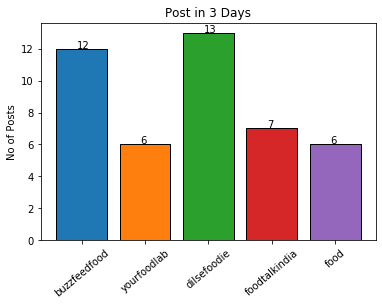

In [10]:
# creating this dictionary to find number of posts in last three days
dictionary2={}
for i in range(len(top_5_usernames)):
    driver.get("https://instagram.com/"+str(top_5_usernames[i]))
    time.sleep(3)
    posts = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,"v1Nh3.kIKUG._bz0w")))
    
    days = 0
    x = datetime.datetime.now()
    today = x.date()
    j=0
    num_posts = 0
# # finding date of posts and then running loop 
# if days is less than three then increasing in number of posts by one 
    while days<=3:
        posts[j].click()
        a=wait.until(EC.presence_of_element_located((By.TAG_NAME,"time")))
        a=a.get_attribute('datetime')[:10]
        close = wait.until(EC.presence_of_element_located((By.XPATH,"//div[contains(@class,'yiMZG')]/button")))
        close.click()
        date_object = datetime.datetime.strptime(a, '%Y-%m-%d').date()
        days = (today-date_object).days
        j+=1
        num_posts+=1
    dictionary2[top_5_usernames[i]] = num_posts

time.sleep(1)
names=[]
values=[]
# plooting graphs by storing them in values and names
for keys,value in dictionary2.items():
    names.append(keys)
    values.append(value)
# plotting the graph
plt.title("Post in 3 Days")
plt.ylabel("No of Posts")
plt.xticks(rotation=40)
for i in range(len(names)):
    plt.bar(names[i],values[i],edgecolor='black')
plt.text(-0.07,values[0]+0.04,values[0])
plt.text(0.93,values[1]+0.04,values[1])
plt.text(1.93,values[2]+0.04,values[2])
plt.text(2.93,values[3]+0.04,values[3])
plt.text(3.93,values[4]+0.04,values[4])
plt.show()

## Your friend also needs a list of hashtags that he should use in his posts.
### Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
### Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
### Create a csv file with two columns : the word and its frequency
### Now, find the hashtags that were most popular among these bloggers
### Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [11]:
# creating a dictionary for obtaining hastags
d={}
def freqd(l):    
    for ele in l:
        if ele in d:
            d[ele]+=1
        else:
            d[ele]=1
    return d
text = [None]*10
# running loop for top usernames
for i in range(len(top_5_usernames)):
    driver.get("https://instagram.com/"+str(top_5_usernames[i]))    
    posts = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,"v1Nh3.kIKUG._bz0w")))[:10]
    for j in range(10):        
        posts[j].click()
#         obtaining post text 
        data_posts=wait.until(EC.presence_of_element_located((By.XPATH,"//div[contains(@class,'C4VMK')]/span")))
        text[j] = data_posts.text
        close_button=wait.until(EC.presence_of_element_located((By.XPATH,"//div[contains(@class,'_2dDPU')]/div[3]/button")))
        close_button.click()
#         checking for emojis, extra spaces and other symbols for text and replacing them by space
        for ele in text[j]:
            if ord(ele)>256 or ele in ["\n",".","{","}","(",")","-",":",",","","&" ]:     # stop-words
                text[j]=text[j].replace(ele, " ")
        words = text[j].split(" ")
# creating frequency for hastags 
        ans = freqd(words)

In [12]:
# creating csv file for data
import pandas as pd
import numpy as np
arr = []
for i in ans:
    s=[]
    s.append(i)
    s.append(ans[i])
    arr.append(s)
arr=np.array(arr)

data_freq=pd.DataFrame({"Words":arr[:,0],"Frequency":arr[:,1]})
data_freq.to_csv('freq.csv',index=False)

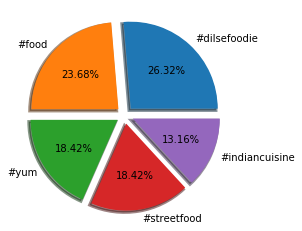

In [13]:
# plotting graph for those hashtags
data_freq = data_freq[data_freq["Words"].str.startswith("#")]
for i in range(len(data_freq)):
    data_freq.iloc[i][1] = int(data_freq.iloc[i][1])
data_freq = data_freq.sort_values(by=["Frequency"],ascending=False)
names = data_freq.Words.values[:5]
values = data_freq.Frequency.values[:5]
explode=[0.1]*5

plt.pie(values,labels=names,shadow=True,autopct = "%.2f%%", wedgeprops = {'linewidth': 3},explode=explode)
plt.show()

## You need to also calculate average followers : likes ratio for the obtained handles.
## Followers : Likes ratio is calculated as follows:
### Find out the likes of the top 10 posts of the 5 handles obtained earlier.
### Calculate the average likes for a handle.
### Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
### Create a bar graph to depict the above obtained information.

In [ ]:
# this code can't be run in my browser as my instagram is updated and number of likes are no longer avilable
# please contact before evaluating 8742039115
wait=WebDriverWait(driver,10)
# creating dictionary for appending required result
dict4 = {}
for i in range(len(top_5_usernames)):
    dict4[top_5_usernames[i]] = []
# running loop for top five usernames
for i in range(len(top_5_usernames)):
    driver.get("https://instagram.com/"+str(top_5_usernames[i]))
# going to first 10 posts
    for j in range(10):
        posts = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,"v1Nh3.kIKUG._bz0w")))[:10]
        posts[j].click()
        time.sleep(1)
# getting their likes if it is a simple post
        try:
            likes = wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"Nm9Fw")]/button/span')))
            like = likes.get_attribute("innerHTML")
            like=int(like.replace(",",""))
            dict4[top_5_usernames[i]].append(like)
            time.sleep(1)
            close_button=wait.until(EC.presence_of_element_located((By.XPATH,"//div[contains(@class,'_2dDPU')]/div[3]/button")))
            close_button.click() 
# this except condition is for igtv videos which have views as well as likes
        except:
            actions = ActionChains(driver)
            views = driver.find_element_by_class_name('vcOH2')
            views.click()
            likes = wait.until(EC.presence_of_element_located((By.XPATH,'//div[contains(@class,"vJRqr")]/span')))
            like = likes.get_attribute("innerHTML")
            like=int(like.replace(",",""))
            dict4[top_5_usernames[i]].append(like)
            time.sleep(1)
            close_button=wait.until(EC.presence_of_element_located((By.XPATH,"//div[contains(@class,'_2dDPU')]/div[3]/button")))
            actions.double_click(close_button).perform();
      
        
# printing the result
for i in range(5):
    dict4[top_5_usernames[i]] = np.array(dict4[top_5_usernames[i]])
    print("For Username: ",dict1[i][0], "Follower:Like is :")
    print((dict4[top_5_usernames[i]].mean()) / dict1[i][1])
# plotting the graph
names = []
values= []
for i in range(5):
    names.append(dict1[i][0])
    values.append((dict4[top_5_usernames[i]].mean()) / dict1[i][1])
plt.title("Usernames")
plt.ylabel("Followers:like Ratio")
plt.xticks(rotation=40)
for i in range(len(names)):
    plt.bar(names[i],values[i],edgecolor='black')
plt.text(-0.07,values[0]+0.04,values[0])
plt.text(0.93,values[1]+0.04,values[1])
plt.text(1.93,values[2]+0.04,values[2])
plt.text(2.93,values[3]+0.04,values[3])
plt.text(3.93,values[4]+0.04,values[4])
plt.show()  
    
